In [7]:
import numpy as np
import torch
import torchvision
from torchvision.transforms import v2 as transforms

DATA_PATH = "data/soap/soap-80-20-20/"

In [9]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
])

train_dataset = torchvision.datasets.ImageFolder(DATA_PATH + "train", transform=train_transforms)
train_dataset

Dataset ImageFolder
    Number of datapoints: 757
    Root location: data/soap/soap-80-20-20/train
    StandardTransform
Transform: Compose(
                 Resize(size=[224, 224], interpolation=InterpolationMode.BILINEAR, antialias=True)
                 ToImage()
                 ToDtype(scale=True)
           )

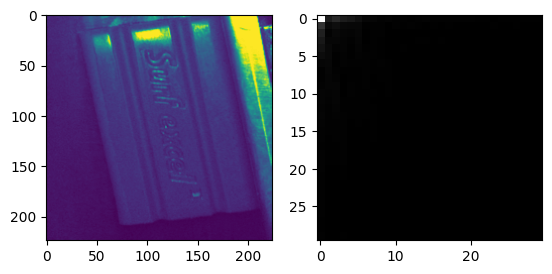

In [20]:
import matplotlib.pyplot as plt

i = 90

def get_fourier_magnitudes(x):
    y = np.fft.rfft2(x)
    return np.sqrt(y.real ** 2 + y.imag ** 2)


img = train_dataset[i][0][0]
ft = get_fourier_magnitudes(img)

_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax2.imshow(ft[:30, :30], cmap="gray")

np.float32(-0.2455045)

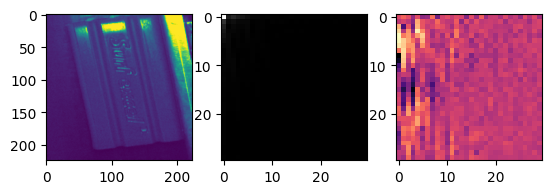

In [22]:
i = 105

img = train_dataset[i][0][0]
ft2 = get_fourier_magnitudes(img)
difference = ft - ft2

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img0)
ax2.imshow(ft[:30, :30], cmap="gray")
ax3.imshow(diff[:30, :30], cmap="magma")

np.mean(difference)

  0%|          | 0/757 [00:00<?, ?it/s]

0.9194187582562747


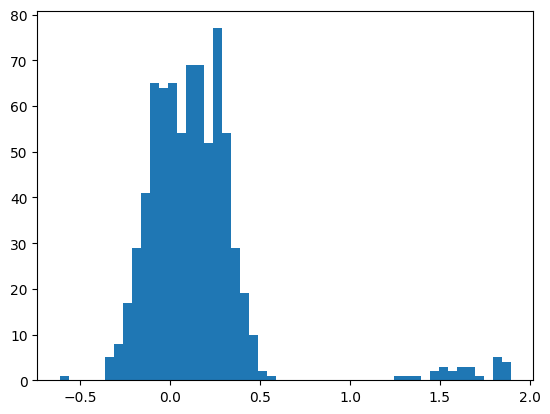

In [30]:
from tqdm.notebook import tqdm

diffs = []
correct = 0

for img, label in tqdm(train_dataset):
    ft2 = get_fourier_magnitudes(img)
    
    diff = np.mean(ft - ft2) 
    diffs.append(diff)

    if diff > 1:
        correct += 0 == label
    else:
        correct += 1 == label

plt.hist(diffs, bins=50)
print(correct / len(train_dataset))